# Linear equation systems #2

Solve for x and y:

$a_{11}x + a_{12}y = b_1$ 

$a_{21}x + a_{22}y = b_2$

## Example:

Solve:

$4x + 5y = -2$

$2x -3y = 1$ 

In [1]:
import matplotlib.pyplot as plt

import numpy as np

### 1. Graphic solution:

In [2]:
x = np.arange(-5, 5, 0.01)


In [3]:
y1 = (-4*x - 2)/5

y2 = (2*x - 1)/3

In [4]:
idx = np.argwhere(np.diff(np.sign(y2 - y1))).flatten()
print(float(x[idx]), float(y1[idx]))

-0.050000000000105516 -0.3599999999999156


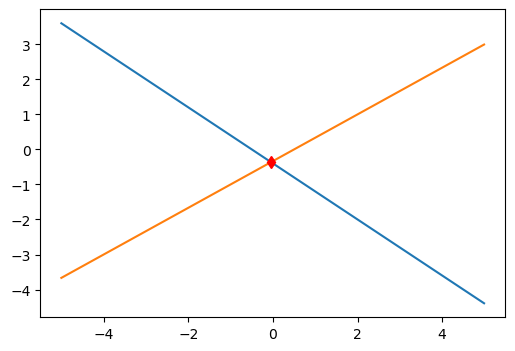

In [5]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y1)
ax.plot(x, y2)

ax.plot(x[idx], y1[idx], 'd', c = 'red')
plt.show()

## 4. LU decomposition method:

## Example:

Solve:

$4x + 5y = -2$

$2x -3y = 1$ 

In [6]:
A = np.array([[4, 5], [2, -3]])

print(A)

[[ 4  5]
 [ 2 -3]]


In [7]:
b = np.array([[-2, 1]]).T

print(b)

[[-2]
 [ 1]]


### Use: https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html

In [8]:
import scipy.linalg  

In [9]:
P, L, U = scipy.linalg.lu(A)

In [10]:
print(P)

[[1. 0.]
 [0. 1.]]


In [11]:
print(L)

[[1.  0. ]
 [0.5 1. ]]


In [12]:
print(U)

[[ 4.   5. ]
 [ 0.  -5.5]]


In [13]:
A1 = P @ L @ U

print(A1)

[[ 4.  5.]
 [ 2. -3.]]


In [14]:
A2 = np.array([[2, -3], [4, 5]])

print(A2)

[[ 2 -3]
 [ 4  5]]


In [15]:
P2, L2, U2 = scipy.linalg.lu(A2)

In [16]:
print(P2)

[[0. 1.]
 [1. 0.]]


In [17]:
A2 = P2 @L2 @ U2

print(A2)

[[ 2. -3.]
 [ 4.  5.]]


In [18]:
Linv = np.linalg.inv(L)

Uinv = np.linalg.inv(U)

In [19]:
print(Linv)

[[ 1.   0. ]
 [-0.5  1. ]]


In [20]:
print(Uinv)

[[ 0.25        0.22727273]
 [-0.         -0.18181818]]


In [21]:
y = Linv @ b

print(y)

[[-2.]
 [ 2.]]


In [22]:
x_sln = Uinv @ y

print(x_sln)

[[-0.04545455]
 [-0.36363636]]


## Example:

$4x + 3y + 2z = 25$

$3x -5y + 2z = -4$

$-2x + 2y + 3z = -10$

In [23]:
A = np.array([[4, 3, 2], [3, -5, 2], [-2, 2, 3]])

In [24]:
b = np.array([[25], [-4], [-10]])

print(b)

[[ 25]
 [ -4]
 [-10]]


In [25]:
P, L, U = scipy.linalg.lu(A)

In [26]:
print(P)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [27]:
print(L)

[[ 1.          0.          0.        ]
 [ 0.75        1.          0.        ]
 [-0.5        -0.48275862  1.        ]]


In [28]:
print(U)

[[ 4.          3.          2.        ]
 [ 0.         -7.25        0.5       ]
 [ 0.          0.          4.24137931]]


In [29]:
Linv = np.linalg.inv(L)
Uinv = np.linalg.inv(U)

print(Linv)
print(Uinv)

[[ 1.          0.          0.        ]
 [-0.75        1.          0.        ]
 [ 0.13793103  0.48275862  1.        ]]
[[ 0.25        0.10344828 -0.1300813 ]
 [-0.         -0.13793103  0.01626016]
 [ 0.          0.          0.23577236]]


In [30]:
yy = Linv @ b

print(yy)

[[ 25.        ]
 [-22.75      ]
 [ -8.48275862]]


In [31]:
xx_sln = Uinv @ yy

print(xx_sln)

[[ 5.]
 [ 3.]
 [-2.]]


## 5. Gauss elimination method:


Documentation: 

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter14.04-Solutions-to-Systems-of-Linear-Equations.html


Code reference:

https://www.delftstack.com/howto/python/gaussian-elimination-using-pivoting/


In [32]:
#from numpy import array, zeros, fabs, linalg

a = np.array([[4, 3, 2], [3, -5, 2], [-2, 2, 3]], float)
#the b matrix constant terms of the equations 
b = np.array([25, -4, -10], float)

print("Solution by NumPy:")
print(np.linalg.solve(a, b))

Solution by NumPy:
[ 5.  3. -2.]


In [33]:
from numpy import array, zeros, fabs, linalg

In [34]:
n = len(b)
x = zeros(n, float)

#first loop specifys the fixed row
for k in range(n-1):
    if fabs(a[k,k]) < 1.0e-12:
        
        for i in range(k+1, n):
            if fabs(a[i,k]) > fabs(a[k,k]):
                a[[k,i]] = a[[i,k]]
                b[[k,i]] = b[[i,k]]
                break

 #applies the elimination below the fixed row

    for i in range(k+1,n):
        if a[i,k] == 0:continue

        factor = a[k,k]/a[i,k]
        for j in range(k,n):
            a[i,j] = a[k,j] - a[i,j]*factor
            #we also calculate the b vector of each row
        b[i] = b[k] - b[i]*factor
#print(a)
#print(b)


x[n-1] = b[n-1] / a[n-1, n-1]
for i in range(n-2, -1, -1):
    sum_ax = 0
  
    for j in range(i+1, n):
        sum_ax += a[i,j] * x[j]
        
    x[i] = (b[i] - sum_ax) / a[i,i]

print("The solution of the system is:", x)

The solution of the system is: [ 5.  3. -2.]


## 6. Gauss-Jordan Method:

In [35]:
def showMatrix():
    print("\n")
    for i in sd:
        for j in i:
            print(j, end="\t\t")
        print("\n")


def getone(pp):
    for i in range(len(sd[0])):
        if sd[pp][pp] != 1:
            q00 = sd[pp][pp]

            for j in range(len(sd[0])):
                sd[pp][j] = sd[pp][j] / q00


def getzero(r, c):
    for i in range(len(sd[0])):
        if sd[r][c] != 0:
            q04 = sd[r][c]
    
            for j in range(len(sd[0])):
                sd[r][j] = sd[r][j] - ((q04) * sd[c][j])

In [36]:
[[4, 3, 2], [3, -5, 2], [-2, 2, 3]]

# 3 x 3
sd = [
    [4, 3, 2, 25],
    [3, -5, 2, -4],
    [-2, 2, 3, -10]
]

showMatrix()



4		3		2		25		

3		-5		2		-4		

-2		2		3		-10		



In [37]:
for i in range(len(sd)):
    getone(i)

    for j in range(len(sd)):
        if i != j:
            getzero(j, i)

showMatrix()



1.0		0.0		0.0		5.0		

0.0		1.0		0.0		3.0		

0.0		0.0		1.0		-2.0		



## 6. Gauss-Seidel Method

The Gauss-Seidel Method is a specific iterative method, that is always using the latest estimated value for each elements in 𝑥. 

Documentation and code reference:

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter14.04-Solutions-to-Systems-of-Linear-Equations.html

## Example:

Solve:

$8x+3y-3z=14$

$-2x+8y+5z=5$

$3x+5y+10z=-8$

In [38]:

AA = np.array([[8, 3, -3], [-2, 8, 5], [3, 5, 10]], float)
#the b matrix constant terms of the equations 
BB = np.array([14, 5, -8], float)


sln = np.linalg.solve(AA, BB)
print("Solution by NumPy:")
#print(np.linalg.solve(AA, BB))
print(sln)

Solution by NumPy:
[ 0.36012365  1.86553323 -1.84080371]


In [39]:
a = [[8, 3, -3], [-2, -8, 5], [3, 5, 10]]

# Find diagonal coefficients
diag = np.diag(np.abs(a)) 

# Find row sum without diagonal
off_diag = np.sum(np.abs(a), axis=1) - diag 

if np.all(diag > off_diag):
    print('matrix is diagonally dominant')
else:
    print('NOT diagonally dominant')

matrix is diagonally dominant


In [40]:
x1 = 0
x2 = 0
x3 = 0

epsilon = 0.000001
converged = False

x_old = np.array([x1, x2, x3]) # my guess

print('Iteration results')
print(' k,    x1,     x2,     x3')

Iteration results
 k,    x1,     x2,     x3


In [41]:
for k in range(1, 50):
    x1 = (14 - 3*x2 + 3*x3)/8
    x2 = (5 + 2*x1 - 5*x3)/8
    x3 = (-8 -3*x1 - 5*x2)/10
    x = np.array([x1, x2, x3])
    
    # check if it is smaller than threshold
    dx = np.sqrt(np.dot(x - x_old, x - x_old))
    
    print("%d, %.4f, %.4f, %.4f"%(k, x1, x2, x3))
    
    
    if dx < epsilon:
        converged = True
        print('Converged!')
        break
    
        # assign the latest x value to the old value
    x_old = x
    
if not converged:
    print('Not converge, increase the # of iterations')

1, 1.7500, 1.0625, -1.8562
2, 0.6555, 1.9490, -1.9712
3, 0.2799, 1.9270, -1.8475
4, 0.3346, 1.8633, -1.8320
5, 0.3642, 1.8611, -1.8398
6, 0.3622, 1.8654, -1.8414
7, 0.3600, 1.8658, -1.8409
8, 0.3600, 1.8656, -1.8408
9, 0.3601, 1.8655, -1.8408
10, 0.3601, 1.8655, -1.8408
11, 0.3601, 1.8655, -1.8408
12, 0.3601, 1.8655, -1.8408
13, 0.3601, 1.8655, -1.8408
Converged!
